#모델 학습

In [ ]:
import pandas as pd

df = pd.read_csv('/content/train_v5.csv', encoding='cp949')
df

,datetime,date,time,기온(°C),습도(%),month,경북_신규확진자수,구미 혁신도시배수지 유출유량 적산차,총인구수,세대수
0,2017-01-01 1:00,2017-01-01,1:00:00,-0.6,99.0,1,0,138.0,"16,738","6,215"
1,2017-01-01 2:00,2017-01-01,2:00:00,0.0,99.0,1,0,237.0,"16,738","6,215"
2,2017-01-01 3:00,2017-01-01,3:00:00,-0.5,98.0,1,0,128.0,"16,738","6,215"
3,2017-01-01 4:00,2017-01-01,4:00:00,-1.3,99.0,1,0,14.0,"16,738","6,215"
4,2017-01-01 5:00,2017-01-01,5:00:00,-2.2,99.0,1,0,11.0,"16,738","6,215"
...,...,...,...,...,...,...,...,...,...,...
35058,2020-12-31 19:00,2020-12-31,19:00:00,-2.4,55.0,12,23,328.0,"22,487","8,818"
35059,2020-12-31 20:00,2020-12-31,20:00:00,-3.2,61.0,12,23,347.0,"22,487","8,818"
35060,2020-12-31 21:00,2020-12-31,21:00:00,-3.7,67.0,12,23,335.0,"22,487","8,818"
35061,2020-12-31 22:00,2020-12-31,22:00:00,-4.0,68.0,12,23,141.0,"22,487","8,818"


In [ ]:
df['총인구수'] = df['총인구수'].str.replace(',', '').astype(int)
df['세대수'] = df['세대수'].str.replace(',', '').astype(int)

In [ ]:
df.corr()

,기온(°C),습도(%),month,경북_신규확진자수,구미 혁신도시배수지 유출유량 적산차,총인구수,세대수
기온(°C),1.000000,0.125865,0.173674,-0.136205,0.008043,0.078650,0.083741
습도(%),0.125865,1.000000,0.220605,-0.041687,0.007634,0.090345,0.090908
month,0.173674,0.220605,1.000000,-0.007456,0.006968,0.260042,0.259812
경북_신규확진자수,-0.136205,-0.041687,-0.007456,1.000000,0.000545,0.185518,0.196481
구미 혁신도시배수지 유출유량 적산차,0.008043,0.007634,0.006968,0.000545,1.000000,0.001543,0.001845
총인구수,0.078650,0.090345,0.260042,0.185518,0.001543,1.000000,0.997699
세대수,0.083741,0.090908,0.259812,0.196481,0.001845,0.997699,1.000000


In [ ]:
df = df[['datetime','기온(°C)', '습도(%)', '구미 혁신도시배수지 유출유량 적산차']]

In [ ]:
df_label = pd.read_csv('/content/정답_label_v2.csv')
df_label

,datetime,구미 혁신도시배수지 유출유량 적산차,h0,h1,h2,h3,h4,h5,h6,h7,...,h326,h327,h328,h329,h330,h331,h332,h333,h334,h335
0,2017-01-01 01:00:00,138.0,237.0,128.0,14.0,11.0,10.0,11.0,187.0,392.0,...,450.0,315.0,276.0,221.0,56.0,203.0,257.0,164.0,114.0,35.0
1,2017-01-01 02:00:00,237.0,128.0,14.0,11.0,10.0,11.0,187.0,392.0,114.0,...,315.0,276.0,221.0,56.0,203.0,257.0,164.0,114.0,35.0,32.0
2,2017-01-01 03:00:00,128.0,14.0,11.0,10.0,11.0,187.0,392.0,114.0,243.0,...,276.0,221.0,56.0,203.0,257.0,164.0,114.0,35.0,32.0,29.0
3,2017-01-01 04:00:00,14.0,11.0,10.0,11.0,187.0,392.0,114.0,243.0,203.0,...,221.0,56.0,203.0,257.0,164.0,114.0,35.0,32.0,29.0,26.0
4,2017-01-01 05:00:00,11.0,10.0,11.0,187.0,392.0,114.0,243.0,203.0,250.0,...,56.0,203.0,257.0,164.0,114.0,35.0,32.0,29.0,26.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34722,2020-12-17 19:00:00,322.0,286.0,377.0,426.0,392.0,191.0,180.0,147.0,65.0,...,387.0,368.0,173.0,347.0,335.0,204.0,254.0,473.0,305.0,328.0
34723,2020-12-17 20:00:00,286.0,377.0,426.0,392.0,191.0,180.0,147.0,65.0,56.0,...,368.0,173.0,347.0,335.0,204.0,254.0,473.0,305.0,328.0,347.0
34724,2020-12-17 21:00:00,377.0,426.0,392.0,191.0,180.0,147.0,65.0,56.0,53.0,...,173.0,347.0,335.0,204.0,254.0,473.0,305.0,328.0,347.0,335.0
34725,2020-12-17 22:00:00,426.0,392.0,191.0,180.0,147.0,65.0,56.0,53.0,35.0,...,347.0,335.0,204.0,254.0,473.0,305.0,328.0,347.0,335.0,141.0


In [ ]:
#추후 tess_v3와 결합해서 사용하기 위해 copy 진행
df_train = df.copy()
df_tr_label = df_label.copy()

In [ ]:
df = df.head(34727)
df

,datetime,기온(°C),습도(%),구미 혁신도시배수지 유출유량 적산차
0,2017-01-01 1:00,-0.6,99.0,138.0
1,2017-01-01 2:00,0.0,99.0,237.0
2,2017-01-01 3:00,-0.5,98.0,128.0
3,2017-01-01 4:00,-1.3,99.0,14.0
4,2017-01-01 5:00,-2.2,99.0,11.0
...,...,...,...,...
34722,2020-12-17 19:00,-1.7,36.0,322.0
34723,2020-12-17 20:00,-2.7,44.0,286.0
34724,2020-12-17 21:00,-3.8,50.0,377.0
34725,2020-12-17 22:00,-4.2,58.0,426.0


In [ ]:
df_label.drop(columns=['datetime','구미 혁신도시배수지 유출유량 적산차'], inplace=True)
df_label

,h0,h1,h2,h3,h4,h5,h6,h7,h8,h9,...,h326,h327,h328,h329,h330,h331,h332,h333,h334,h335
0,237.0,128.0,14.0,11.0,10.0,11.0,187.0,392.0,114.0,243.0,...,450.0,315.0,276.0,221.0,56.0,203.0,257.0,164.0,114.0,35.0
1,128.0,14.0,11.0,10.0,11.0,187.0,392.0,114.0,243.0,203.0,...,315.0,276.0,221.0,56.0,203.0,257.0,164.0,114.0,35.0,32.0
2,14.0,11.0,10.0,11.0,187.0,392.0,114.0,243.0,203.0,250.0,...,276.0,221.0,56.0,203.0,257.0,164.0,114.0,35.0,32.0,29.0
3,11.0,10.0,11.0,187.0,392.0,114.0,243.0,203.0,250.0,181.0,...,221.0,56.0,203.0,257.0,164.0,114.0,35.0,32.0,29.0,26.0
4,10.0,11.0,187.0,392.0,114.0,243.0,203.0,250.0,181.0,141.0,...,56.0,203.0,257.0,164.0,114.0,35.0,32.0,29.0,26.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34722,286.0,377.0,426.0,392.0,191.0,180.0,147.0,65.0,56.0,53.0,...,387.0,368.0,173.0,347.0,335.0,204.0,254.0,473.0,305.0,328.0
34723,377.0,426.0,392.0,191.0,180.0,147.0,65.0,56.0,53.0,35.0,...,368.0,173.0,347.0,335.0,204.0,254.0,473.0,305.0,328.0,347.0
34724,426.0,392.0,191.0,180.0,147.0,65.0,56.0,53.0,35.0,114.0,...,173.0,347.0,335.0,204.0,254.0,473.0,305.0,328.0,347.0,335.0
34725,392.0,191.0,180.0,147.0,65.0,56.0,53.0,35.0,114.0,178.0,...,347.0,335.0,204.0,254.0,473.0,305.0,328.0,347.0,335.0,141.0


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df

,datetime,기온(°C),습도(%),구미 혁신도시배수지 유출유량 적산차,hour,month,day
0,2017-01-01 01:00:00,-0.6,99.0,138.0,1,1,1
1,2017-01-01 02:00:00,0.0,99.0,237.0,2,1,1
2,2017-01-01 03:00:00,-0.5,98.0,128.0,3,1,1
3,2017-01-01 04:00:00,-1.3,99.0,14.0,4,1,1
4,2017-01-01 05:00:00,-2.2,99.0,11.0,5,1,1
...,...,...,...,...,...,...,...
34722,2020-12-17 19:00:00,-1.7,36.0,322.0,19,12,17
34723,2020-12-17 20:00:00,-2.7,44.0,286.0,20,12,17
34724,2020-12-17 21:00:00,-3.8,50.0,377.0,21,12,17
34725,2020-12-17 22:00:00,-4.2,58.0,426.0,22,12,17


In [ ]:
def fourier_features(index, freq, order):
    time = np.arange(len(index), dtype=np.float32)
    k = 2 * np.pi * (1 / freq) * time
    features = {}
    for i in range(1, order + 1):
        features.update({
            f"cos_{freq}_{i}": np.cos(i * k),
        })
    return pd.DataFrame(features, index=index)

In [ ]:
import numpy as np

df['cos_24_1'] = np.cos(2 * np.pi * df['hour']/23.0)
fourier_features(df['hour'], 24, 1)

,cos_24_1
hour,
1,1.000000
2,0.965926
3,0.866025
4,0.707107
5,0.500000
...,...
19,-0.000101
20,0.258644
21,0.500619


In [ ]:
df.columns

Index(['datetime', '기온(°C)', '습도(%)', '구미 혁신도시배수지 유출유량 적산차', 'hour', 'month',
       'day', 'cos_24_1'],
      dtype='object')

In [ ]:
df.corr()

,기온(°C),습도(%),구미 혁신도시배수지 유출유량 적산차,hour,month,day,cos_24_1
기온(°C),1.000000,0.123791,0.008155,0.172733,0.198835,0.015889,-0.145514
습도(%),0.123791,1.000000,0.007683,-0.301121,0.229769,0.018912,0.263697
구미 혁신도시배수지 유출유량 적산차,0.008155,0.007683,1.000000,0.002327,0.007010,0.003265,0.006707
hour,0.172733,-0.301121,0.002327,1.000000,-0.000076,-0.000080,0.000064
month,0.198835,0.229769,0.007010,-0.000076,1.000000,-0.004956,0.000061
day,0.015889,0.018912,0.003265,-0.000080,-0.004956,1.000000,0.000064
cos_24_1,-0.145514,0.263697,0.006707,0.000064,0.000061,0.000064,1.000000


In [ ]:
df = df[['기온(°C)', '습도(%)', '구미 혁신도시배수지 유출유량 적산차', 'cos_24_1', 'day', 'month']]

In [ ]:
#결측치 처리
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter = 10, random_state = 0)
df1 = pd.DataFrame(imputer.fit_transform(df))

df1.columns = df.columns
df1

,기온(°C),습도(%),구미 혁신도시배수지 유출유량 적산차,cos_24_1,day,month
0,-0.6,99.0,138.0,0.962917,1.0,1.0
1,0.0,99.0,237.0,0.854419,1.0,1.0
2,-0.5,98.0,128.0,0.682553,1.0,1.0
3,-1.3,99.0,14.0,0.460065,1.0,1.0
4,-2.2,99.0,11.0,0.203456,1.0,1.0
...,...,...,...,...,...,...
34722,-1.7,36.0,322.0,0.460065,17.0,12.0
34723,-2.7,44.0,286.0,0.682553,17.0,12.0
34724,-3.8,50.0,377.0,0.854419,17.0,12.0
34725,-4.2,58.0,426.0,0.962917,17.0,12.0


In [ ]:
df1.isnull().sum()

기온(°C)                 0
습도(%)                  0
구미 혁신도시배수지 유출유량 적산차    0
cos_24_1               0
day                    0
month                  0
dtype: int64

In [ ]:
TEST_SIZE = 300
window_size = 50

train = df1[:-TEST_SIZE]
test = df1[-TEST_SIZE:]
train

,기온(°C),습도(%),구미 혁신도시배수지 유출유량 적산차,cos_24_1,day,month
0,-0.6,99.0,138.0,0.962917,1.0,1.0
1,0.0,99.0,237.0,0.854419,1.0,1.0
2,-0.5,98.0,128.0,0.682553,1.0,1.0
3,-1.3,99.0,14.0,0.460065,1.0,1.0
4,-2.2,99.0,11.0,0.203456,1.0,1.0
...,...,...,...,...,...,...
34422,-3.2,83.0,46.0,-0.334880,5.0,12.0
34423,-3.3,83.0,40.0,-0.576680,5.0,12.0
34424,-0.5,71.0,139.0,-0.775711,5.0,12.0
34425,1.9,62.0,386.0,-0.917211,5.0,12.0


In [ ]:
label_train = df_label[:-TEST_SIZE]
label_test = df_label[-TEST_SIZE:]
label_train

,h0,h1,h2,h3,h4,h5,h6,h7,h8,h9,...,h326,h327,h328,h329,h330,h331,h332,h333,h334,h335
0,237.0,128.0,14.0,11.0,10.0,11.0,187.0,392.0,114.0,243.0,...,450.0,315.0,276.0,221.0,56.0,203.0,257.0,164.0,114.0,35.0
1,128.0,14.0,11.0,10.0,11.0,187.0,392.0,114.0,243.0,203.0,...,315.0,276.0,221.0,56.0,203.0,257.0,164.0,114.0,35.0,32.0
2,14.0,11.0,10.0,11.0,187.0,392.0,114.0,243.0,203.0,250.0,...,276.0,221.0,56.0,203.0,257.0,164.0,114.0,35.0,32.0,29.0
3,11.0,10.0,11.0,187.0,392.0,114.0,243.0,203.0,250.0,181.0,...,221.0,56.0,203.0,257.0,164.0,114.0,35.0,32.0,29.0,26.0
4,10.0,11.0,187.0,392.0,114.0,243.0,203.0,250.0,181.0,141.0,...,56.0,203.0,257.0,164.0,114.0,35.0,32.0,29.0,26.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34422,40.0,139.0,386.0,547.0,366.0,432.0,219.0,190.0,139.0,244.0,...,366.0,109.0,190.0,161.0,141.0,122.0,73.0,43.0,47.0,51.0
34423,139.0,386.0,547.0,366.0,432.0,219.0,190.0,139.0,244.0,388.0,...,109.0,190.0,161.0,141.0,122.0,73.0,43.0,47.0,51.0,55.0
34424,386.0,547.0,366.0,432.0,219.0,190.0,139.0,244.0,388.0,377.0,...,190.0,161.0,141.0,122.0,73.0,43.0,47.0,51.0,55.0,176.0
34425,547.0,366.0,432.0,219.0,190.0,139.0,244.0,388.0,377.0,360.0,...,161.0,141.0,122.0,73.0,43.0,47.0,51.0,55.0,176.0,320.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(train))
X.columns = train.columns

In [ ]:
zero_padding1 = X.head(49)
for i in zero_padding1.columns :
  zero_padding1[i] = 0

X = pd.concat([zero_padding1, X], axis=0).reset_index().drop(columns='index')
X

<ipython-input-699-a9fe121b59e9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_padding1[i] = 0


,기온(°C),습도(%),구미 혁신도시배수지 유출유량 적산차,cos_24_1,day,month
0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0
1,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0
2,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0
3,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0
4,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0
...,...,...,...,...,...,...
34471,0.216475,0.835052,0.563492,3.294374e-01,0.133333,1.0
34472,0.214559,0.835052,0.563491,2.079713e-01,0.133333,1.0
34473,0.268199,0.711340,0.563500,1.079902e-01,0.133333,1.0
34474,0.314176,0.618557,0.563523,3.690921e-02,0.133333,1.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler_label = MinMaxScaler()
train_label = pd.DataFrame(scaler_label.fit_transform(label_train))
train_label.columns = label_train.columns

In [ ]:
zero_padding2 = train_label.head(49)
for i in zero_padding2.columns :
  zero_padding2[i] = 0

train_label = pd.concat([zero_padding2, train_label], axis=0).reset_index().drop(columns='index')
train_label

<ipython-input-701-c2192e0b8b1e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_padding2[i] = 0


,h0,h1,h2,h3,h4,h5,h6,h7,h8,h9,...,h326,h327,h328,h329,h330,h331,h332,h333,h334,h335
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34471,0.056338,0.195775,0.543662,0.770423,0.515493,0.608451,0.308451,0.267606,0.195775,0.343662,...,0.515493,0.153521,0.267606,0.226761,0.198592,0.171831,0.102817,0.060563,0.066197,0.071831
34472,0.195775,0.543662,0.770423,0.515493,0.608451,0.308451,0.267606,0.195775,0.343662,0.546479,...,0.153521,0.267606,0.226761,0.198592,0.171831,0.102817,0.060563,0.066197,0.071831,0.077465
34473,0.543662,0.770423,0.515493,0.608451,0.308451,0.267606,0.195775,0.343662,0.546479,0.530986,...,0.267606,0.226761,0.198592,0.171831,0.102817,0.060563,0.066197,0.071831,0.077465,0.247887
34474,0.770423,0.515493,0.608451,0.308451,0.267606,0.195775,0.343662,0.546479,0.530986,0.507042,...,0.226761,0.198592,0.171831,0.102817,0.060563,0.066197,0.071831,0.077465,0.247887,0.450704


In [ ]:
train_label1 = train_label.tail(49)

In [ ]:
import numpy as np

def make_dataset(data, label, window_size = 50) :
  feature_list = []
  label_list = []

  for i in range(len(data) - window_size + 1) :
    try:
      feature_list.append(np.array(data.iloc[i:i+window_size])) #train 셋에서 i번째 부터 I+20번째 행까지 추출해 하나의 배열에 담아 빈 리스트에 추가
      label_list.append(np.array(label.iloc[i+window_size-1]))
    except:
      print(f"Tried to index from {i} to {i+window_size} but failed")
      feature_list.append(np.array(data.iloc[i:i+window_size]))
      label_list.append(np.array(label.iloc[i+window_size]))
      raise NotImplementedError
  return np.array(feature_list), np.array(label_list)

In [ ]:
from sklearn.model_selection import train_test_split

train_feature = X
train_label = train_label

train_feature, train_label = make_dataset(train_feature, train_label, window_size=50)

x_train, x_val, y_train, y_val = train_test_split(train_feature, train_label, test_size = 0.3, random_state=3)
print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

(24098, 50, 6) (10329, 50, 6)
(24098, 336) (10329, 336)


In [ ]:
import tensorflow as tf
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(64,
               input_shape=(train_feature.shape[1], train_feature.shape[2]), #input_shape으로 train_feature에 1번 인덱스와 2번 인덱스 값을 가져와 (20,3) 행렬을 input으로 집어 넣겠다는 의미
               activation='relu',
               return_sequences = False)
          )
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(336))

In [ ]:
import os
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae']) #LSTM에서는 옵티마이저를 adam을 많이 씀
early_stop = EarlyStopping(monitor='val_loss', patience=3) #patience 옵션 : 

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train,
                    epochs=800,
                    batch_size=600, 
                    validation_data=(x_val, y_val),
                    callbacks=[early_stop, checkpoint],
                    shuffle=False)

Epoch 1/800
41/41 [==============================] - ETA: 0s - loss: 0.1174 - mae: 0.2725
Epoch 1: val_loss improved from inf to 0.06595, saving model to model/tmp_checkpoint.h5
41/41 [==============================] - 5s 95ms/step - loss: 0.1174 - mae: 0.2725 - val_loss: 0.0659 - val_mae: 0.2047
Epoch 2/800
41/41 [==============================] - ETA: 0s - loss: 0.0540 - mae: 0.1899
Epoch 2: val_loss improved from 0.06595 to 0.04958, saving model to model/tmp_checkpoint.h5
41/41 [==============================] - 5s 118ms/step - loss: 0.0540 - mae: 0.1899 - val_loss: 0.0496 - val_mae: 0.1843
Epoch 3/800
41/41 [==============================] - ETA: 0s - loss: 0.0492 - mae: 0.1838
Epoch 3: val_loss improved from 0.04958 to 0.04917, saving model to model/tmp_checkpoint.h5
41/41 [==============================] - 4s 89ms/step - loss: 0.0492 - mae: 0.1838 - val_loss: 0.0492 - val_mae: 0.1835
Epoch 4/800
41/41 [==============================] - ETA: 0s - loss: 0.0489 - mae: 0.1831
Epoch 4

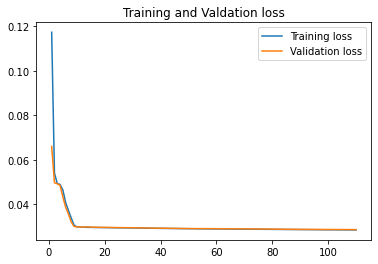

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and Valdation loss')
plt.legend()
plt.show() 

In [ ]:
#test 데이터 검정

In [ ]:
test

,기온(°C),습도(%),구미 혁신도시배수지 유출유량 적산차,cos_24_1,day,month
34427,7.0,47.0,366.0,-0.990686,5.0,12.0
34428,8.1,44.0,432.0,-0.917211,5.0,12.0
34429,7.5,47.0,219.0,-0.775711,5.0,12.0
34430,8.1,47.0,190.0,-0.576680,5.0,12.0
34431,6.8,51.0,139.0,-0.334880,5.0,12.0
...,...,...,...,...,...,...
34722,-1.7,36.0,322.0,0.460065,17.0,12.0
34723,-2.7,44.0,286.0,0.682553,17.0,12.0
34724,-3.8,50.0,377.0,0.854419,17.0,12.0
34725,-4.2,58.0,426.0,0.962917,17.0,12.0


In [ ]:
scaler_val = MinMaxScaler()
scaler1 = MinMaxScaler()
X_test = pd.DataFrame(scaler_val.fit_transform(test))
X_test.columns = test.columns
X_test

,기온(°C),습도(%),구미 혁신도시배수지 유출유량 적산차,cos_24_1,day,month
0,0.752577,0.407895,0.468057,0.000000,0.0,0.0
1,0.809278,0.368421,0.554107,0.036909,0.0,0.0
2,0.778351,0.407895,0.276402,0.107990,0.0,0.0
3,0.809278,0.407895,0.238592,0.207971,0.0,0.0
4,0.742268,0.460526,0.172099,0.329437,0.0,0.0
...,...,...,...,...,...,...
295,0.304124,0.263158,0.410691,0.728769,1.0,0.0
296,0.252577,0.368421,0.363755,0.840534,1.0,0.0
297,0.195876,0.447368,0.482399,0.926869,1.0,0.0
298,0.175258,0.552632,0.546284,0.981372,1.0,0.0


In [ ]:
zero_padding3 = X.tail(49)
#for i in zero_padding3.columns :
#  zero_padding3[i] = 0

X_test = pd.concat([zero_padding3, X_test], axis=0).reset_index().drop(columns='index')
X_test

,기온(°C),습도(%),구미 혁신도시배수지 유출유량 적산차,cos_24_1,day,month
0,0.409962,0.257732,0.563520,5.551115e-17,0.066667,1.0
1,0.419540,0.257732,0.563511,0.000000e+00,0.066667,1.0
2,0.431034,0.278351,0.563529,3.690921e-02,0.066667,1.0
3,0.429119,0.278351,0.563517,1.079902e-01,0.066667,1.0
4,0.425287,0.288660,0.563503,2.079713e-01,0.066667,1.0
...,...,...,...,...,...,...
344,0.304124,0.263158,0.410691,7.287694e-01,1.000000,0.0
345,0.252577,0.368421,0.363755,8.405339e-01,1.000000,0.0
346,0.195876,0.447368,0.482399,9.268691e-01,1.000000,0.0
347,0.175258,0.552632,0.546284,9.813719e-01,1.000000,0.0


In [ ]:
test_label = pd.DataFrame(scaler1.fit_transform(label_test))
test_label.columns = label_test.columns

In [ ]:
zero_padding4 = train_label1
#for i in zero_padding4.columns :
#  zero_padding4[i] = 0

test_label = pd.concat([zero_padding4, test_label], axis=0).reset_index().drop(columns='index')
test_label

,h0,h1,h2,h3,h4,h5,h6,h7,h8,h9,...,h326,h327,h328,h329,h330,h331,h332,h333,h334,h335
0,0.363380,0.638028,0.454930,0.240845,0.311268,0.200000,0.225352,0.263380,0.781690,0.600000,...,0.221127,0.090141,0.081690,0.092958,0.125352,0.392958,0.264789,0.546479,0.194366,0.222535
1,0.638028,0.454930,0.240845,0.311268,0.200000,0.225352,0.263380,0.781690,0.600000,0.670423,...,0.090141,0.081690,0.092958,0.125352,0.392958,0.264789,0.546479,0.194366,0.222535,0.484507
2,0.454930,0.240845,0.311268,0.200000,0.225352,0.263380,0.781690,0.600000,0.670423,0.357746,...,0.081690,0.092958,0.125352,0.392958,0.264789,0.546479,0.194366,0.222535,0.484507,0.473239
3,0.240845,0.311268,0.200000,0.225352,0.263380,0.781690,0.600000,0.670423,0.357746,0.388732,...,0.092958,0.125352,0.392958,0.264789,0.546479,0.194366,0.222535,0.484507,0.473239,0.974648
4,0.311268,0.200000,0.225352,0.263380,0.781690,0.600000,0.670423,0.357746,0.388732,0.238028,...,0.125352,0.392958,0.264789,0.546479,0.194366,0.222535,0.484507,0.473239,0.974648,0.539437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,0.404935,0.537010,0.608128,0.558781,0.267054,0.251089,0.203193,0.084180,0.071118,0.066763,...,0.563272,0.533951,0.233025,0.501543,0.483025,0.280864,0.358025,0.695988,0.436728,0.472222
345,0.537010,0.608128,0.558781,0.267054,0.251089,0.203193,0.084180,0.071118,0.066763,0.040639,...,0.533951,0.233025,0.501543,0.483025,0.280864,0.358025,0.695988,0.436728,0.472222,0.501543
346,0.608128,0.558781,0.267054,0.251089,0.203193,0.084180,0.071118,0.066763,0.040639,0.155298,...,0.233025,0.501543,0.483025,0.280864,0.358025,0.695988,0.436728,0.472222,0.501543,0.483025
347,0.558781,0.267054,0.251089,0.203193,0.084180,0.071118,0.066763,0.040639,0.155298,0.248186,...,0.501543,0.483025,0.280864,0.358025,0.695988,0.436728,0.472222,0.501543,0.483025,0.183642


In [ ]:
X_test = X_test[['기온(°C)', '습도(%)', '구미 혁신도시배수지 유출유량 적산차','cos_24_1', 'month', 'day']]

In [ ]:
X_test

,기온(°C),습도(%),구미 혁신도시배수지 유출유량 적산차,cos_24_1,month,day
0,0.409962,0.257732,0.563520,5.551115e-17,1.0,0.066667
1,0.419540,0.257732,0.563511,0.000000e+00,1.0,0.066667
2,0.431034,0.278351,0.563529,3.690921e-02,1.0,0.066667
3,0.429119,0.278351,0.563517,1.079902e-01,1.0,0.066667
4,0.425287,0.288660,0.563503,2.079713e-01,1.0,0.066667
...,...,...,...,...,...,...
344,0.304124,0.263158,0.410691,7.287694e-01,0.0,1.000000
345,0.252577,0.368421,0.363755,8.405339e-01,0.0,1.000000
346,0.195876,0.447368,0.482399,9.268691e-01,0.0,1.000000
347,0.175258,0.552632,0.546284,9.813719e-01,0.0,1.000000


In [ ]:
test_feature = X_test
test_label = test_label

In [ ]:
test_feature, test_label = make_dataset(test_feature, test_label, window_size = 50)
test_feature.shape, test_label.shape

((300, 50, 6), (300, 336))

In [ ]:
model.load_weights(filename)
pred = pd.DataFrame(model.predict(test_feature))

pred

10/10 [==============================] - 0s 8ms/step


,0,1,2,3,4,5,6,7,8,9,...,326,327,328,329,330,331,332,333,334,335
0,0.369669,0.360974,0.330181,0.293645,0.297566,0.336236,0.383205,0.404684,0.424778,0.425613,...,0.088985,0.066595,0.058308,0.088894,0.177590,0.293139,0.374834,0.397023,0.379651,0.374861
1,0.375531,0.326778,0.283220,0.282334,0.333729,0.373337,0.403245,0.407875,0.416501,0.391167,...,0.058514,0.066203,0.080432,0.171829,0.291324,0.394062,0.395351,0.368191,0.355849,0.376448
2,0.328052,0.279581,0.276978,0.319868,0.371805,0.407061,0.421754,0.407428,0.374506,0.300461,...,0.042643,0.075978,0.165470,0.298896,0.387237,0.402174,0.363285,0.350153,0.354895,0.357417
3,0.305271,0.278028,0.295558,0.356812,0.410412,0.437933,0.422166,0.361917,0.297937,0.217724,...,0.075520,0.149543,0.282427,0.381758,0.406253,0.371718,0.338427,0.345086,0.351711,0.342234
4,0.309626,0.313109,0.334343,0.378469,0.430577,0.437316,0.390659,0.288678,0.207993,0.145918,...,0.175967,0.267198,0.335141,0.371186,0.376860,0.378166,0.348372,0.314677,0.297187,0.309375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.332786,0.342646,0.373514,0.370543,0.310732,0.238666,0.180071,0.130613,0.098054,0.079854,...,0.322818,0.358970,0.389996,0.417392,0.414918,0.357476,0.315619,0.306998,0.313002,0.329226
296,0.361791,0.360804,0.359716,0.319619,0.235467,0.169738,0.126577,0.096198,0.087167,0.099891,...,0.358848,0.367816,0.389922,0.401816,0.390106,0.337194,0.316752,0.328837,0.341021,0.358415
297,0.373041,0.343052,0.301357,0.239651,0.167585,0.123205,0.096614,0.078603,0.101279,0.169242,...,0.373677,0.385941,0.388130,0.372770,0.362150,0.334549,0.344034,0.366331,0.375704,0.383836
298,0.360801,0.287651,0.219088,0.171039,0.136048,0.107403,0.083032,0.087394,0.153817,0.258460,...,0.380773,0.395167,0.376357,0.353472,0.351535,0.348926,0.359384,0.381500,0.395983,0.397909


In [ ]:
pred_inv = pd.DataFrame(scaler1.inverse_transform(np.array(pred).reshape(300,336)))
pred_inv

,0,1,2,3,4,5,6,7,8,9,...,326,327,328,329,330,331,332,333,334,335
0,261.702271,255.710938,234.494904,209.321381,212.022736,238.666275,271.028107,285.827301,299.672058,300.247162,...,79.662209,65.153679,59.783348,79.603500,137.078339,211.954239,264.892731,279.270721,268.013794,264.910065
1,265.741058,232.150238,202.138657,201.528351,236.939072,264.229309,284.835541,288.026001,293.969208,276.514191,...,59.916801,64.899643,74.119644,133.345291,210.777817,277.352264,278.187653,260.587463,252.590027,265.938385
2,233.028091,199.631149,197.837540,227.389221,263.173798,287.465088,297.588531,287.717743,265.034393,214.017868,...,49.632755,71.233688,129.224792,215.684937,272.929474,282.608459,257.408661,248.899109,251.972000,253.606293
3,217.331390,198.561356,210.639725,252.843155,289.774017,308.735687,297.872498,256.361053,212.278549,157.011612,...,70.937042,118.904160,205.012726,269.379089,285.252258,262.873474,241.300995,245.615875,249.908600,243.767700
4,220.332611,222.732346,237.362396,267.765228,303.667206,308.310913,276.164276,205.899338,150.307114,107.537773,...,136.026398,195.144333,239.171158,262.528809,266.205536,267.051544,247.745346,225.911011,214.577469,222.475189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,236.289795,243.083145,264.351440,262.303986,221.094406,171.441193,131.068848,96.992332,74.559067,62.019287,...,231.185944,254.612671,274.717499,292.469727,290.866791,253.644165,226.521362,220.934433,224.825317,235.338699
296,256.273743,255.594193,254.844147,227.217346,169.236465,123.949532,94.211525,73.280731,67.057983,75.824860,...,254.533249,260.344910,274.669281,282.376770,274.789001,240.501465,227.255035,235.086624,242.981323,254.252899
297,264.025360,243.362823,214.634674,172.119293,122.466118,91.888550,73.567192,61.157681,76.781418,123.608063,...,264.142639,272.089569,273.508362,263.554810,256.673126,238.787537,244.934128,259.382385,265.456055,270.725861
298,255.591690,205.191849,157.951477,124.845627,100.736946,81.000519,64.209259,67.214317,112.979874,185.078796,...,268.740967,278.067902,265.879395,251.050095,249.794662,248.104233,254.880585,269.212097,278.597229,279.844879


In [ ]:
label_test

,h0,h1,h2,h3,h4,h5,h6,h7,h8,h9,...,h326,h327,h328,h329,h330,h331,h332,h333,h334,h335
34427,432.0,219.0,190.0,139.0,244.0,388.0,377.0,360.0,487.0,413.0,...,122.0,73.0,43.0,47.0,51.0,55.0,176.0,320.0,433.0,554.0
34428,219.0,190.0,139.0,244.0,388.0,377.0,360.0,487.0,413.0,97.0,...,73.0,43.0,47.0,51.0,55.0,176.0,320.0,433.0,554.0,409.0
34429,190.0,139.0,244.0,388.0,377.0,360.0,487.0,413.0,97.0,153.0,...,43.0,47.0,51.0,55.0,176.0,320.0,433.0,554.0,409.0,121.0
34430,139.0,244.0,388.0,377.0,360.0,487.0,413.0,97.0,153.0,171.0,...,47.0,51.0,55.0,176.0,320.0,433.0,554.0,409.0,121.0,324.0
34431,244.0,388.0,377.0,360.0,487.0,413.0,97.0,153.0,171.0,129.0,...,51.0,55.0,176.0,320.0,433.0,554.0,409.0,121.0,324.0,375.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34722,286.0,377.0,426.0,392.0,191.0,180.0,147.0,65.0,56.0,53.0,...,387.0,368.0,173.0,347.0,335.0,204.0,254.0,473.0,305.0,328.0
34723,377.0,426.0,392.0,191.0,180.0,147.0,65.0,56.0,53.0,35.0,...,368.0,173.0,347.0,335.0,204.0,254.0,473.0,305.0,328.0,347.0
34724,426.0,392.0,191.0,180.0,147.0,65.0,56.0,53.0,35.0,114.0,...,173.0,347.0,335.0,204.0,254.0,473.0,305.0,328.0,347.0,335.0
34725,392.0,191.0,180.0,147.0,65.0,56.0,53.0,35.0,114.0,178.0,...,347.0,335.0,204.0,254.0,473.0,305.0,328.0,347.0,335.0,141.0


In [ ]:
d = pd.DataFrame(test_label)

In [ ]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(d, pred))

0.13757315208790777


In [ ]:
print(mean_absolute_error(label_test, pred_inv))

93.28948667261336


#모델 테스트

In [ ]:
import pandas as pd
df_test = pd.read_csv('/content/test_v3.csv', encoding='cp949')

In [ ]:
df_test = df_test[['datetime','기온(°C)', '습도(%)', '구미 혁신도시배수지 유출유량 적산차']]
df_test

,datetime,기온(°C),습도(%),구미 혁신도시배수지 유출유량 적산차
0,2021-01-01 0:00,-4.3,61.0,106
1,2021-01-01 1:00,-4.8,64.0,184
2,2021-01-01 2:00,-5.4,69.0,277
3,2021-01-01 3:00,-4.4,68.0,197
4,2021-01-01 4:00,-4.9,68.0,72
...,...,...,...,...
8419,2021-12-17 19:00,-4.2,60.0,327
8420,2021-12-17 20:00,-4.3,47.0,513
8421,2021-12-17 21:00,-4.7,42.0,396
8422,2021-12-17 22:00,-5.2,42.0,350


In [ ]:
df_test['datetime'] = pd.to_datetime(df_test['datetime'])
df_test['hour'] = df_test['datetime'].dt.hour
df_test['month'] = df_test['datetime'].dt.month
df_test['day'] = df_test['datetime'].dt.day
df_test

<ipython-input-726-8e769f6ee474>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['datetime'] = pd.to_datetime(df_test['datetime'])
<ipython-input-726-8e769f6ee474>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['hour'] = df_test['datetime'].dt.hour
<ipython-input-726-8e769f6ee474>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

,datetime,기온(°C),습도(%),구미 혁신도시배수지 유출유량 적산차,hour,month,day
0,2021-01-01 00:00:00,-4.3,61.0,106,0,1,1
1,2021-01-01 01:00:00,-4.8,64.0,184,1,1,1
2,2021-01-01 02:00:00,-5.4,69.0,277,2,1,1
3,2021-01-01 03:00:00,-4.4,68.0,197,3,1,1
4,2021-01-01 04:00:00,-4.9,68.0,72,4,1,1
...,...,...,...,...,...,...,...
8419,2021-12-17 19:00:00,-4.2,60.0,327,19,12,17
8420,2021-12-17 20:00:00,-4.3,47.0,513,20,12,17
8421,2021-12-17 21:00:00,-4.7,42.0,396,21,12,17
8422,2021-12-17 22:00:00,-5.2,42.0,350,22,12,17


In [ ]:
def fourier_features(index, freq, order):
    time = np.arange(len(index), dtype=np.float32)
    k = 2 * np.pi * (1 / freq) * time
    features = {}
    for i in range(1, order + 1):
        features.update({
            f"cos_{freq}_{i}": np.cos(i * k),
        })
    return pd.DataFrame(features, index=index)

In [ ]:
import numpy as np

df_test['cos_24_1'] = np.cos(2 * np.pi * df_test['hour']/23.0)
fourier_features(df_test['hour'], 24, 1)

,cos_24_1
hour,
0,1.000000
1,0.965926
2,0.866025
3,0.707107
4,0.500000
...,...
19,0.258882
20,0.499987
21,0.707212


In [ ]:
test = df_test[['기온(°C)', '습도(%)', 'month', '구미 혁신도시배수지 유출유량 적산차', 'day', 'cos_24_1']]

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter = 10, random_state = 0)
test1 = pd.DataFrame(imputer.fit_transform(test))

test1.columns = test.columns
test1

,기온(°C),습도(%),month,구미 혁신도시배수지 유출유량 적산차,day,cos_24_1
0,-4.3,61.0,1.0,106.0,1.0,1.000000
1,-4.8,64.0,1.0,184.0,1.0,0.962917
2,-5.4,69.0,1.0,277.0,1.0,0.854419
3,-4.4,68.0,1.0,197.0,1.0,0.682553
4,-4.9,68.0,1.0,72.0,1.0,0.460065
...,...,...,...,...,...,...
8419,-4.2,60.0,12.0,327.0,17.0,0.460065
8420,-4.3,47.0,12.0,513.0,17.0,0.682553
8421,-4.7,42.0,12.0,396.0,17.0,0.854419
8422,-5.2,42.0,12.0,350.0,17.0,0.962917


In [ ]:
test1.isnull().sum()

기온(°C)                 0
습도(%)                  0
month                  0
구미 혁신도시배수지 유출유량 적산차    0
day                    0
cos_24_1               0
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler_ts = MinMaxScaler()
test_x = pd.DataFrame(scaler_ts.fit_transform(test1))
test_x.columns = test1.columns

In [ ]:
#zero3 = test_x.head(30)
#for i in zero3.columns:
#  zero3[i] = 0

#test_x = pd.concat([zero3, test_x], axis=0).reset_index().drop(columns='index')
#test_x

In [ ]:
#df1

In [ ]:
train_x = pd.DataFrame(scaler_ts.fit_transform(df1))
train_x.columns = df1.columns
train_x

,기온(°C),습도(%),구미 혁신도시배수지 유출유량 적산차,cos_24_1,day,month
0,0.266284,1.000000,0.563500,0.981372,0.000000,0.0
1,0.277778,1.000000,0.563509,0.926869,0.000000,0.0
2,0.268199,0.989691,0.563499,0.840534,0.000000,0.0
3,0.252874,1.000000,0.563489,0.728769,0.000000,0.0
4,0.235632,1.000000,0.563488,0.599865,0.000000,0.0
...,...,...,...,...,...,...
34722,0.245211,0.350515,0.563517,0.728769,0.533333,1.0
34723,0.226054,0.432990,0.563514,0.840534,0.533333,1.0
34724,0.204981,0.494845,0.563522,0.926869,0.533333,1.0
34725,0.197318,0.577320,0.563527,0.981372,0.533333,1.0


In [ ]:
df_train = train_x.tail(50)
test_x = pd.concat([df_train, test_x], axis=0).reset_index().drop(columns='index')
test_x

,기온(°C),습도(%),구미 혁신도시배수지 유출유량 적산차,cos_24_1,day,month
0,0.201149,0.463918,0.563519,0.981372,0.466667,1.0
1,0.187739,0.525773,0.563516,1.000000,0.466667,1.0
2,0.180077,0.546392,0.563502,1.000000,0.500000,1.0
3,0.172414,0.577320,0.563498,0.981372,0.500000,1.0
4,0.168582,0.597938,0.563501,0.926869,0.500000,1.0
...,...,...,...,...,...,...
8469,0.194274,0.568182,0.242222,0.728769,0.533333,1.0
8470,0.192229,0.420455,0.380000,0.840534,0.533333,1.0
8471,0.184049,0.363636,0.293333,0.926869,0.533333,1.0
8472,0.173824,0.363636,0.259259,0.981372,0.533333,1.0


In [ ]:
feature_list = []
for i in range(len(test_x) - 49) :
  #print(i)
  feature_list.append(np.array(test_x.iloc[i:i+50]))

feature_list = np.array(feature_list)
print(feature_list.shape)


(8425, 50, 6)


In [ ]:
model.load_weights(filename)
pred = pd.DataFrame(model.predict(feature_list))

pred

264/264 [==============================] - 2s 8ms/step


,0,1,2,3,4,5,6,7,8,9,...,326,327,328,329,330,331,332,333,334,335
0,0.314485,0.244797,0.174986,0.125883,0.096828,0.088974,0.077093,0.120053,0.218325,0.316266,...,0.404275,0.382759,0.350761,0.327316,0.328076,0.359489,0.376688,0.390820,0.384378,0.367344
1,0.235865,0.169375,0.119994,0.093909,0.088265,0.112389,0.143480,0.214107,0.309614,0.381849,...,0.384929,0.361919,0.341736,0.337155,0.352944,0.382514,0.388476,0.380013,0.346110,0.302124
2,0.161401,0.103370,0.081878,0.075508,0.084144,0.138393,0.211647,0.299806,0.374522,0.410716,...,0.360221,0.338690,0.337460,0.357672,0.387244,0.403804,0.397848,0.367322,0.306721,0.235639
3,0.118423,0.062316,0.044926,0.062437,0.117405,0.207192,0.291740,0.346425,0.385126,0.413365,...,0.334128,0.338165,0.352830,0.382854,0.409535,0.413931,0.380689,0.317655,0.243519,0.178935
4,0.092462,0.049673,0.046079,0.087228,0.184309,0.293476,0.352603,0.344718,0.339240,0.377742,...,0.329896,0.376046,0.388320,0.401154,0.410805,0.401448,0.350425,0.255645,0.171954,0.119700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,0.287949,0.283805,0.315794,0.323408,0.281968,0.228512,0.193391,0.148524,0.113362,0.097777,...,0.294416,0.342362,0.375380,0.398569,0.396822,0.337908,0.304360,0.296291,0.294435,0.295661
8421,0.303090,0.282151,0.291513,0.283554,0.234060,0.176412,0.137648,0.102010,0.094218,0.117514,...,0.339454,0.367901,0.381066,0.388731,0.378817,0.328133,0.303803,0.307707,0.315942,0.322470
8422,0.308386,0.268063,0.251948,0.223857,0.171142,0.125252,0.099810,0.084585,0.104808,0.162282,...,0.366330,0.380129,0.374104,0.366740,0.358311,0.325653,0.321363,0.334248,0.341214,0.339639
8423,0.293480,0.230236,0.192386,0.166961,0.140186,0.119081,0.100405,0.102968,0.151114,0.232255,...,0.372906,0.383064,0.366642,0.354918,0.349920,0.331778,0.326198,0.334055,0.338290,0.330940


In [ ]:
pred_inv = pd.DataFrame(scaler_label.inverse_transform(np.array(pred).reshape(8425,336)))
pred_inv

,0,1,2,3,4,5,6,7,8,9,...,326,327,328,329,330,331,332,333,334,335
0,223.284470,173.805573,124.240242,89.376678,68.748100,63.171379,54.736267,85.237755,155.010651,224.549179,...,287.035217,271.758820,249.040176,232.394547,232.933899,255.236954,267.448242,277.481995,272.908447,260.814514
1,167.464157,120.256371,85.195724,66.675072,62.668396,79.796272,101.870461,152.016113,219.825836,271.112457,...,273.299316,256.962677,242.632889,239.379700,250.590164,271.584869,275.817871,269.809174,245.737839,214.508057
2,114.594849,73.392769,58.133732,53.610451,59.741951,98.259377,150.269104,212.862488,265.910767,291.608307,...,255.756866,240.469803,239.596588,253.947403,274.942963,286.701080,282.471924,260.798767,217.771576,167.303528
3,84.080353,44.244431,31.897730,44.330448,83.357201,147.106323,207.135193,245.961746,273.439362,293.488892,...,237.231216,240.097351,250.509064,271.826538,290.770111,293.890930,270.288971,225.535278,172.898651,127.043739
4,65.648224,35.267986,32.716286,61.931950,130.859665,208.368240,250.348267,244.749771,240.860580,268.196533,...,234.225937,266.992310,275.706909,284.819061,291.671722,285.028320,248.802032,181.508194,122.087471,84.987267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,204.444000,201.501511,224.213501,229.619446,200.196960,162.243530,137.307388,105.452362,80.487305,69.421921,...,209.035278,243.076920,266.519775,282.984314,281.743805,239.914825,216.095581,210.366943,209.049057,209.919357
8421,215.193909,200.327133,206.974564,201.323135,166.182831,125.252434,97.730247,72.427185,66.894981,83.434883,...,241.011993,261.209564,270.556549,275.999023,268.960327,232.974258,215.700134,218.471786,224.318604,228.953522
8422,218.953781,190.324463,178.882736,158.938766,121.511040,88.928864,70.865356,60.055580,74.414032,115.220139,...,260.094391,269.891327,265.614075,260.385468,254.401154,231.213470,228.167709,237.316299,242.262085,241.143799
8423,208.370865,163.467422,136.593826,118.542412,99.532288,84.547386,71.287674,73.106949,107.290741,164.901031,...,264.763062,271.975555,260.315765,251.991852,248.442932,235.562332,231.600693,237.179352,240.185974,234.967422


In [ ]:
name = []
for i in range(336) :
    name.append('h%d'%i)
    
name[:10]

['h0', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'h7', 'h8', 'h9']

In [ ]:
pred_inv.columns = name
pred_inv

,h0,h1,h2,h3,h4,h5,h6,h7,h8,h9,...,h326,h327,h328,h329,h330,h331,h332,h333,h334,h335
0,223.284470,173.805573,124.240242,89.376678,68.748100,63.171379,54.736267,85.237755,155.010651,224.549179,...,287.035217,271.758820,249.040176,232.394547,232.933899,255.236954,267.448242,277.481995,272.908447,260.814514
1,167.464157,120.256371,85.195724,66.675072,62.668396,79.796272,101.870461,152.016113,219.825836,271.112457,...,273.299316,256.962677,242.632889,239.379700,250.590164,271.584869,275.817871,269.809174,245.737839,214.508057
2,114.594849,73.392769,58.133732,53.610451,59.741951,98.259377,150.269104,212.862488,265.910767,291.608307,...,255.756866,240.469803,239.596588,253.947403,274.942963,286.701080,282.471924,260.798767,217.771576,167.303528
3,84.080353,44.244431,31.897730,44.330448,83.357201,147.106323,207.135193,245.961746,273.439362,293.488892,...,237.231216,240.097351,250.509064,271.826538,290.770111,293.890930,270.288971,225.535278,172.898651,127.043739
4,65.648224,35.267986,32.716286,61.931950,130.859665,208.368240,250.348267,244.749771,240.860580,268.196533,...,234.225937,266.992310,275.706909,284.819061,291.671722,285.028320,248.802032,181.508194,122.087471,84.987267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,204.444000,201.501511,224.213501,229.619446,200.196960,162.243530,137.307388,105.452362,80.487305,69.421921,...,209.035278,243.076920,266.519775,282.984314,281.743805,239.914825,216.095581,210.366943,209.049057,209.919357
8421,215.193909,200.327133,206.974564,201.323135,166.182831,125.252434,97.730247,72.427185,66.894981,83.434883,...,241.011993,261.209564,270.556549,275.999023,268.960327,232.974258,215.700134,218.471786,224.318604,228.953522
8422,218.953781,190.324463,178.882736,158.938766,121.511040,88.928864,70.865356,60.055580,74.414032,115.220139,...,260.094391,269.891327,265.614075,260.385468,254.401154,231.213470,228.167709,237.316299,242.262085,241.143799
8423,208.370865,163.467422,136.593826,118.542412,99.532288,84.547386,71.287674,73.106949,107.290741,164.901031,...,264.763062,271.975555,260.315765,251.991852,248.442932,235.562332,231.600693,237.179352,240.185974,234.967422


In [ ]:
pred_inv.max()

h0      498.261230
h1      452.159637
h2      484.129425
h3      535.645996
h4      596.097168
           ...    
h331    597.961609
h332    500.422791
h333    428.782501
h334    475.487152
h335    496.250305
Length: 336, dtype: float32

In [ ]:
sample_ts = pd.concat([df_test['datetime'], pred_inv], axis=1)
sample_ts

,datetime,h0,h1,h2,h3,h4,h5,h6,h7,h8,...,h326,h327,h328,h329,h330,h331,h332,h333,h334,h335
0,2021-01-01 00:00:00,223.284470,173.805573,124.240242,89.376678,68.748100,63.171379,54.736267,85.237755,155.010651,...,287.035217,271.758820,249.040176,232.394547,232.933899,255.236954,267.448242,277.481995,272.908447,260.814514
1,2021-01-01 01:00:00,167.464157,120.256371,85.195724,66.675072,62.668396,79.796272,101.870461,152.016113,219.825836,...,273.299316,256.962677,242.632889,239.379700,250.590164,271.584869,275.817871,269.809174,245.737839,214.508057
2,2021-01-01 02:00:00,114.594849,73.392769,58.133732,53.610451,59.741951,98.259377,150.269104,212.862488,265.910767,...,255.756866,240.469803,239.596588,253.947403,274.942963,286.701080,282.471924,260.798767,217.771576,167.303528
3,2021-01-01 03:00:00,84.080353,44.244431,31.897730,44.330448,83.357201,147.106323,207.135193,245.961746,273.439362,...,237.231216,240.097351,250.509064,271.826538,290.770111,293.890930,270.288971,225.535278,172.898651,127.043739
4,2021-01-01 04:00:00,65.648224,35.267986,32.716286,61.931950,130.859665,208.368240,250.348267,244.749771,240.860580,...,234.225937,266.992310,275.706909,284.819061,291.671722,285.028320,248.802032,181.508194,122.087471,84.987267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2021-12-17 20:00:00,204.444000,201.501511,224.213501,229.619446,200.196960,162.243530,137.307388,105.452362,80.487305,...,209.035278,243.076920,266.519775,282.984314,281.743805,239.914825,216.095581,210.366943,209.049057,209.919357
8421,2021-12-17 21:00:00,215.193909,200.327133,206.974564,201.323135,166.182831,125.252434,97.730247,72.427185,66.894981,...,241.011993,261.209564,270.556549,275.999023,268.960327,232.974258,215.700134,218.471786,224.318604,228.953522
8422,2021-12-17 22:00:00,218.953781,190.324463,178.882736,158.938766,121.511040,88.928864,70.865356,60.055580,74.414032,...,260.094391,269.891327,265.614075,260.385468,254.401154,231.213470,228.167709,237.316299,242.262085,241.143799
8423,2021-12-17 23:00:00,208.370865,163.467422,136.593826,118.542412,99.532288,84.547386,71.287674,73.106949,107.290741,...,264.763062,271.975555,260.315765,251.991852,248.442932,235.562332,231.600693,237.179352,240.185974,234.967422


In [ ]:
sample_ts.head(15)

,datetime,h0,h1,h2,h3,h4,h5,h6,h7,h8,...,h326,h327,h328,h329,h330,h331,h332,h333,h334,h335
0,2021-01-01 00:00:00,223.284470,173.805573,124.240242,89.376678,68.748100,63.171379,54.736267,85.237755,155.010651,...,287.035217,271.758820,249.040176,232.394547,232.933899,255.236954,267.448242,277.481995,272.908447,260.814514
1,2021-01-01 01:00:00,167.464157,120.256371,85.195724,66.675072,62.668396,79.796272,101.870461,152.016113,219.825836,...,273.299316,256.962677,242.632889,239.379700,250.590164,271.584869,275.817871,269.809174,245.737839,214.508057
2,2021-01-01 02:00:00,114.594849,73.392769,58.133732,53.610451,59.741951,98.259377,150.269104,212.862488,265.910767,...,255.756866,240.469803,239.596588,253.947403,274.942963,286.701080,282.471924,260.798767,217.771576,167.303528
3,2021-01-01 03:00:00,84.080353,44.244431,31.897730,44.330448,83.357201,147.106323,207.135193,245.961746,273.439362,...,237.231216,240.097351,250.509064,271.826538,290.770111,293.890930,270.288971,225.535278,172.898651,127.043739
4,2021-01-01 04:00:00,65.648224,35.267986,32.716286,61.931950,130.859665,208.368240,250.348267,244.749771,240.860580,...,234.225937,266.992310,275.706909,284.819061,291.671722,285.028320,248.802032,181.508194,122.087471,84.987267
5,2021-01-01 05:00:00,54.781208,29.370872,52.092510,111.925362,187.460800,238.482513,251.898804,236.643036,234.429001,...,246.020935,289.156219,290.025269,291.676056,286.068939,253.832993,196.549713,131.126770,89.944801,65.699074
6,2021-01-01 06:00:00,44.536880,42.315292,95.517532,173.113922,230.737320,246.269943,245.332550,233.910995,234.490189,...,259.640137,298.919617,296.531158,285.841858,263.337372,204.689621,139.734695,89.379448,64.471207,50.195168
7,2021-01-01 07:00:00,63.093285,93.923409,153.669128,217.055832,250.391632,246.762619,246.984268,232.350006,226.335587,...,278.430237,303.843750,289.950592,254.871170,214.955093,154.253998,98.388260,60.335831,43.645386,49.632950
8,2021-01-01 08:00:00,110.342682,156.985672,195.278717,223.334061,242.066635,244.275894,250.894608,225.387115,207.696991,...,280.389374,299.824768,270.507568,212.701294,166.196838,118.271523,79.382652,46.810596,34.346142,62.016651
9,2021-01-01 09:00:00,174.809525,202.570206,213.931030,222.987228,234.584381,238.703568,243.293564,213.344910,196.166855,...,255.629272,254.322693,224.585175,177.636292,134.101471,87.988098,53.402596,43.120235,60.593079,114.070030


In [ ]:
sample_ts.to_csv('sample6.csv', index=False)